# Chess (King-Rook vs. King) Data Set
## Data preprocessing


This dataset was taken from the UCI Machine Learning Repository at: https://archive.ics.uci.edu/ml/datasets/Chess+%28King-Rook+vs.+King%29
  Here the dataset will have categorical values and integer values. There will be total of 28056 instances, and the total number of attributes is 6. The dataset here is a multivariate. 

In [1]:
# import all the requirements
# import pandas and numpy 
import pandas as pd
import numpy as np

In [2]:
# read the data from krkopt.data using read_csv
df = pd.read_csv('./krkopt.data', header=None)
df.columns = ['wkf', 'wkr', 'wrf', 'wrr', 'bkf', 'bkr', 'class']

In [3]:
# know the shape of the data
df.shape


(28056, 7)

In [4]:
# using head() print the first five columns of the data
df.head()

,wkf,wkr,wrf,wrr,bkf,bkr,class
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [5]:
#use to know the information like min,max,mean etc...
df.describe()

,wkr,wrr,bkr
count,28056.000000,28056.000000,28056.000000
mean,1.854006,4.512404,4.451811
std,0.926414,2.282723,2.248387
min,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000
50%,2.000000,5.000000,4.000000
75%,2.000000,6.000000,6.000000
max,4.000000,8.000000,8.000000


In [6]:
# using unique() find the unique class labels
df['class'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [7]:
#Using value_counts() we will get the information of class
df['class'].value_counts()

fourteen    4553
thirteen    4194
twelve      3597
eleven      2854
draw        2796
fifteen     2166
ten         1985
nine        1712
eight       1433
seven        683
six          592
five         471
sixteen      390
two          246
four         198
three         81
one           78
zero          27
Name: class, dtype: int64

In [8]:
# using info() find the information of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
wkf      28056 non-null object
wkr      28056 non-null int64
wrf      28056 non-null object
wrr      28056 non-null int64
bkf      28056 non-null object
bkr      28056 non-null int64
class    28056 non-null object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [9]:
#using isnull() find whether there are any missing data points in every attribute
df.isnull().sum()

wkf      0
wkr      0
wrf      0
wrr      0
bkf      0
bkr      0
class    0
dtype: int64

We can clearly see that there are no missing attributes in the data that is provided. 

Now we will find the information of each and every attribute separately, By using value_counts()

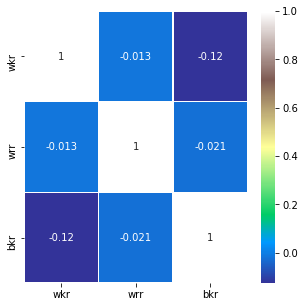

In [28]:
# we will now plot the heatmap to know about the correaltion between the attributes.
# import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap to find the correlation.
sns.heatmap(df.corr(),annot=True,cmap='terrain',linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

From the above heatmap we can clearly know that there is no much correlation.

In [11]:
#Using value_counts() we will get the information of wkf(White king file)
df['wkf'].value_counts()

d    12136
c     8726
b     5316
a     1878
Name: wkf, dtype: int64

In [12]:
#Using value_counts() we will get the information of wkr(white king rank)
df['wkr'].value_counts()

1    12666
2     8540
3     5130
4     1720
Name: wkr, dtype: int64

In [13]:
#Using value_counts() we will get the information of wrf(white rook file)
df['wrf'].value_counts()

h    3616
g    3599
f    3582
e    3576
a    3468
b    3438
c    3409
d    3368
Name: wrf, dtype: int64

In [14]:
#Using value_counts() we will get the information of wrr(white rook rank)
df['wrr'].value_counts()

5    3549
4    3541
6    3531
7    3514
3    3512
8    3497
2    3483
1    3429
Name: wrr, dtype: int64

In [15]:
#Using value_counts() we will get the information of bkf(black king file)
df['bkf'].value_counts()

h    4848
g    4600
f    4352
e    3450
a    2920
d    2796
b    2700
c    2390
Name: bkf, dtype: int64

In [16]:
#Using value_counts() we will get the information of bkr(black king rank)
df['bkr'].value_counts()

5    3822
4    3788
1    3664
6    3608
3    3506
7    3360
2    3196
8    3112
Name: bkr, dtype: int64

In [17]:
#Convert categorical variable into dummy/indicator variables by using pd.get_dummies()
d_wkf = pd.get_dummies(df['wkf'], prefix='wkf')
d_wkr = pd.get_dummies(df['wkr'], prefix='wkr')
d_wrf = pd.get_dummies(df['wrf'], prefix='wrf')
d_wrr = pd.get_dummies(df['wrr'], prefix='wrr')
d_bkf = pd.get_dummies(df['bkf'], prefix='bkf')
d_bkr = pd.get_dummies(df['bkr'], prefix='bkr')

In [18]:
df_new = pd.concat([d_wkf, d_wkr, d_wrf, d_wrr, d_bkf, d_bkr, df['class']], axis=1)

In [19]:
# We will now look at the new shape of the data after converting into dummies.
df_new.iloc[:, :-1].shape

(28056, 40)

LabelEncoder can be used to normalize labels. We will import LabelEncoder from sklearn.preprocessing we will also use fit_transform(y) for Fit label encoder and return encoded labels

In [20]:
# import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
X = df_new.iloc[:, :-1]
y = df_new['class']
le = LabelEncoder()
#fit label encoder and return encoded values using fit_transform (y)
y = le.fit_transform(y)
le.classes_

array(['draw', 'eight', 'eleven', 'fifteen', 'five', 'four', 'fourteen',
       'nine', 'one', 'seven', 'six', 'sixteen', 'ten', 'thirteen',
       'three', 'twelve', 'two', 'zero'], dtype=object)

In [21]:
# We will use le.transform() for Transform labels to normalized encoding.
le.transform(le.classes_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [22]:
#Know about the new head
df_new.head()

,wkf_a,wkf_b,wkf_c,wkf_d,wkr_1,wkr_2,wkr_3,wkr_4,wrf_a,wrf_b,...,bkf_h,bkr_1,bkr_2,bkr_3,bkr_4,bkr_5,bkr_6,bkr_7,bkr_8,class
0,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,draw
1,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,draw
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,draw
3,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,draw
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,draw


In [23]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

 Now we will split the data and create our models.

## Create our model

In [24]:
# import train_test_split from model_selection and accuracy score, classification report from metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
# split the total data into 70% training data and 30% testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### For taking a reference model that is a benchmark model we will select Decision tree as the bencmark model. We will try to achieve the better accuracy than this benchmark model

In [25]:
X_test.shape

(8417, 40)

In [34]:
# import DecisionTreeClassifier from sklearn.tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(min_samples_split = 50)
# fit the training data
dt = dt.fit(X_train, y_train)
# predict the training data
pred = dt.predict(X_train)
# calculate f_score of training data
print('\nDecision tree - Train F score', round(f1_score(y_train, pred,average='micro'),3))
# predict the testing data
pred = dt.predict(X_test)
# calculate f_score of testing data
print('\nDecision tree - Test F score', round(f1_score(y_test, pred,average='micro'),3))


Decision tree - Train F score 0.652

Decision tree - Test F score 0.601


#### We achieved a test accuracy of 0.601 and we will try to achieve the better model than this benchmark model and we will declare that model with better accuracy than this benchmark Model as the better model

### Random Forest

In [35]:
# import RandomForestClassifier from sklear.ensemble 
from sklearn.ensemble import RandomForestClassifier
rf_fit = RandomForestClassifier(n_estimators=1000,random_state=1)
# fit the training data 
rf_fit.fit(X_train, y_train)

# find the accuracy score of trained data
print('\nRandom Forest - Train F score', f1_score(y_train, rf_fit.predict(X_train),average='micro'))

 # find the accuracy score of  testing data
print('\nRandom Forest - Test F score', round(f1_score(y_test, rf_fit.predict(X_test),average='micro'),3))


Random Forest - Train F score 1.0

Random Forest - Test F score 0.737


### Support Vector Machine

In [36]:
# import svm from sklearn
from sklearn import svm # Support vector machine

rbfSVM = svm.SVC(kernel='rbf', C=1, gamma=0.1)
#fit the training data
rbfSVM.fit(X_train, y_train)
# find the accuracy of trained data
pred = rbfSVM.predict(X_train)
print('\nrbf SVM - Train F score: ',round(f1_score(y_train, pred,average='micro'),3))
# find the accuracy score of testing data
pred = rbfSVM.predict(X_test)
print('\nrbf SVM - Test F score: ',round(f1_score(y_test, pred,average='micro'),3))


rbf SVM - Train F score:  0.715

rbf SVM - Test F score:  0.654


#### From the above two classification models used we can see that random forest has the best accuracy with the test F score of 0.737. so we can say that out of the two chosen models random forest is the best. It also achieves far more accuracy than the benchmark model.

#### See whether the change in the random state change the accuracy drastically.

In [40]:
# import RandomForestClassifier from sklear.ensemble 
from sklearn.ensemble import RandomForestClassifier
rf_fit = RandomForestClassifier(n_estimators=1000,random_state=1)
# fit the training data 
rf_fit.fit(X_train, y_train)

# find the accuracy score of trained data
print('\nRandom Forest - Train F score', round(f1_score(y_train, rf_fit.predict(X_train),average='micro'),3))

 # find the accuracy score of  testing data
print('\nRandom Forest - Test F score', round(f1_score(y_test, rf_fit.predict(X_test),average='micro'),3))


Random Forest - Train F score 1.0

Random Forest - Test F score 0.737


In [38]:
# import RandomForestClassifier from sklear.ensemble 
#we check for the random_state=2
# import RandomForestClassifier from sklear.ensemble 
from sklearn.ensemble import RandomForestClassifier
rf_fit = RandomForestClassifier(n_estimators=1000,random_state=2)
# fit the training data 
rf_fit.fit(X_train, y_train)

# find the accuracy score of trained data
print('\nRandom Forest - Train F score', round(f1_score(y_train, rf_fit.predict(X_train),average='micro'),3))

 # find the accuracy score of  testing data
print('\nRandom Forest - Test F score', round(f1_score(y_test, rf_fit.predict(X_test),average='micro'),3))


Random Forest - Train F score 1.0

Random Forest - Test F score 0.736


In [39]:
# import RandomForestClassifier from sklear.ensemble 
# now we will check for random_state=3
# import RandomForestClassifier from sklear.ensemble 
from sklearn.ensemble import RandomForestClassifier
rf_fit = RandomForestClassifier(n_estimators=1000,random_state=3)
# fit the training data 
rf_fit.fit(X_train, y_train)

# find the accuracy score of trained data
print('\nRandom Forest - Train F score', round(f1_score(y_train, rf_fit.predict(X_train),average='micro'),3))

 # find the accuracy score of  testing data
print('\nRandom Forest - Test F score', round(f1_score(y_test, rf_fit.predict(X_test),average='micro'),3))


Random Forest - Train F score 1.0

Random Forest - Test F score 0.738


#### From the above three codes we can see that the F score will not drastically change and the mean F score is same as the F score obained when we assign random_state=1 i.e. 0.738. So we can say that the changes in the data will not efect the accuracy drastically.

### Refinement
 Now we will refine the model which we obtained above. We will tune the random forest and will try to obtain the better F score than the aboveobtained random forest.
 We will assign n_estimators=[450,500] and criterian as 'gini' and 'entropy'inorder to achieve the better F score than the above model.

In [41]:
from sklearn.metrics import make_scorer, accuracy_score, fbeta_score
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=1)

# TODO: Create the parameters list you wish to tune
parameters = {'n_estimators': [450,500], 
              'criterion': ['gini', 'entropy']}

# TODO: Make an fbeta_score scoring object


# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf,parameters,scoring='accuracy')

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores

print("\nOptimized Model\n------")
print("Final f1 score on the testing data: {:.4f}".format(round(f1_score(y_test, best_predictions,average='micro'),3)))


C:\Users\mypc\Anaconda3.0\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mypc\Anaconda3.0\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Optimized Model
------
Final f1 score on the testing data: 0.7400


#### F score for the refined model:
 The F score for the tuned Random Forest is 0.7400 which is slightly better than the un tuned F score.

### Feature Importance

We will now find the important features according to their rank by using feature_importances_

In [46]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    # function for printing the feature ranking
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        # we will now find the important features using feature_importances_
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
19) wrr_4                          0.037653
20) wrr_5                          0.036209
13) wrf_f                          0.034607
18) wrr_3                          0.034324
14) wrf_g                          0.033953
21) wrr_6                          0.033392
12) wrf_e                          0.033073
11) wrf_d                          0.031509
17) wrr_2                          0.030871
22) wrr_7                          0.030840
15) wrf_h                          0.030829
 9) wrf_b                          0.029656
10) wrf_c                          0.029470
23) wrr_8                          0.029227
30) bkf_g                          0.028807
16) wrr_1                          0.028409
31) bkf_h                          0.028004
32) bkr_1                          0.027820
 8) wrf_a                          0.027294
34) bkr_3                          0.025261
33) bkr_2                          0.024293
29) bkf_f                          0.024031
24) bkf_a      

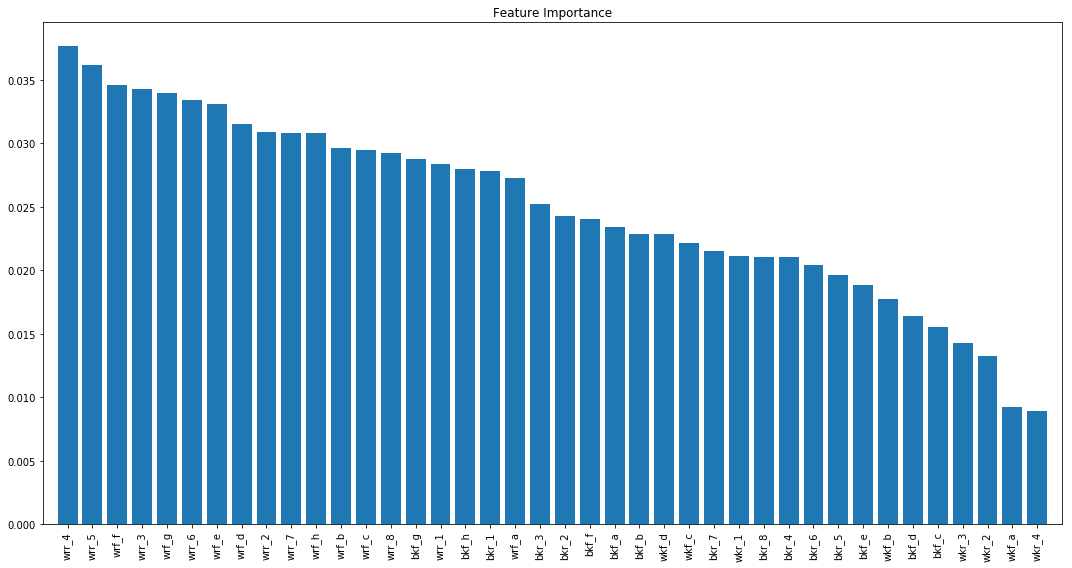

In [47]:
# plotting the graph for Important Features
plt.figure(figsize=(15, 8))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X_train, y_train)

## Conclusion:
 From the above models we can clearly say that Random Forest is the better model that can be used in King-Rook vs. King game. By using Tuned Random Forest we can achieve an F score of 0.7400 which is better than the other models. And we also concluded the imported features according to their rank that is wrr_4 is the most important feature and wkr_4 is the least important feature.